### Step 1: Import required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 3: Data preprocessing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# check missing values
df.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# dropping the columns which are not required for the analysis
# df.drop(columns=["CustomerID","Gender"],inplace=True)
df.drop(columns=["Gender"],axis=1,inplace=True)

In [14]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Step 4: EDA

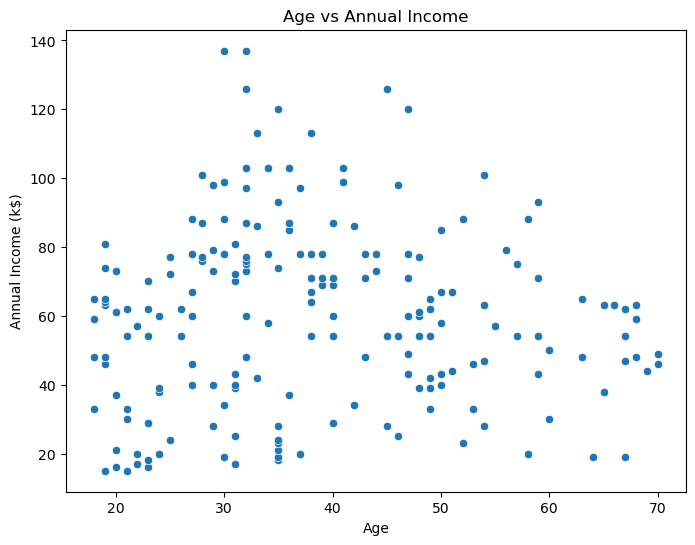

In [19]:
# display age and annual income scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

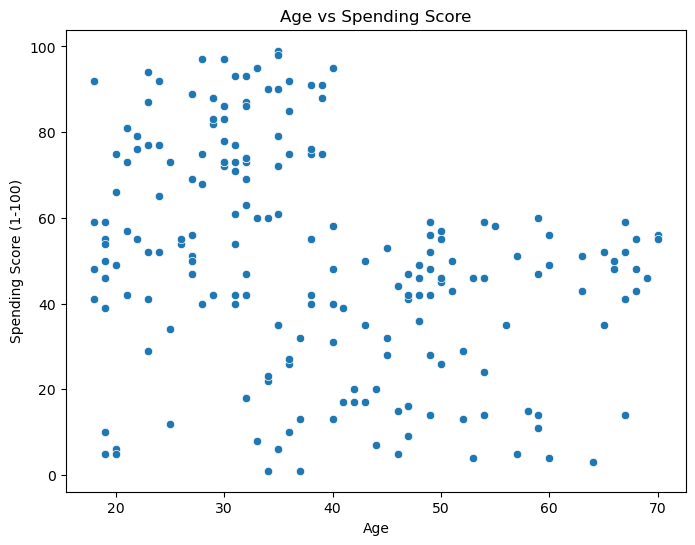

In [ ]:
# display age and Spending score scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

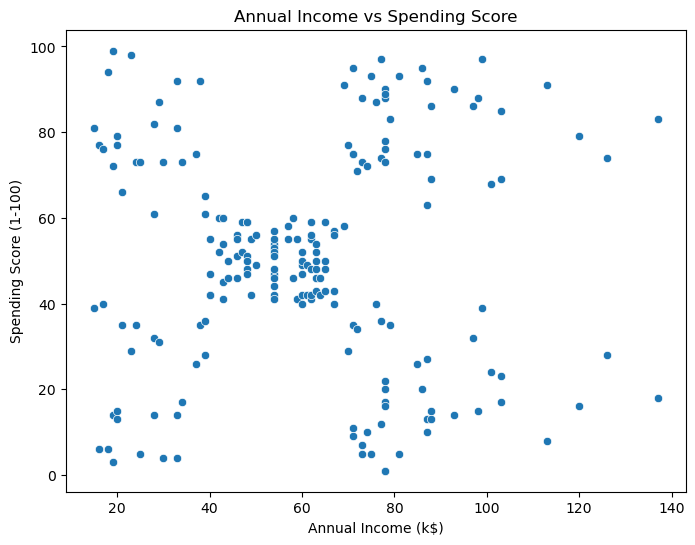

In [ ]:
# display the annual income and spending score scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Step 5: Feature Engineering


In [23]:
# display skewness name normal , right skewed , left skewed
def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age:",skewness_name(df["Age"].skew()))
print("Skewness of Annual Income:",skewness_name(df["Annual Income (k$)"].skew()))
print("Skewness of Spending score:",skewness_name(df["Spending Score (1-100)"].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending score: Left Skewed


In [24]:
# scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Step 6: Train the model

In [31]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
df["Cluster"]=kmeans.labels_
df.head()




c:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

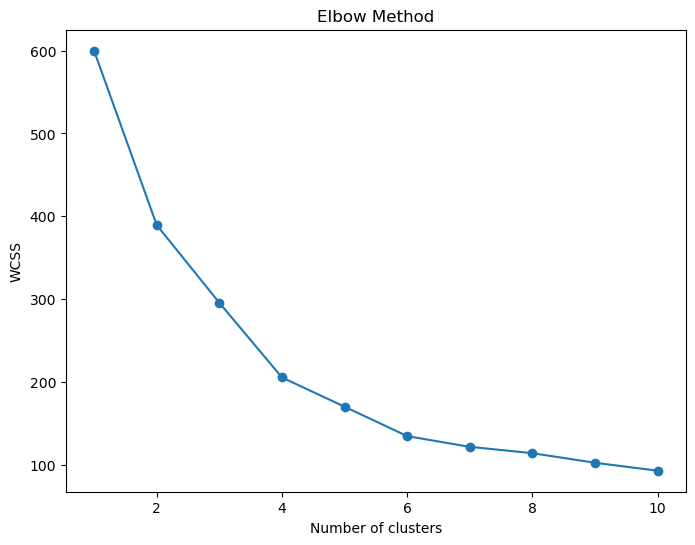

In [33]:
#check the Elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

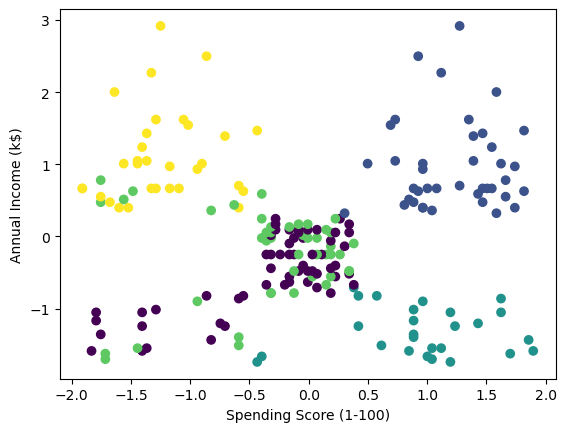

In [34]:
# display clusters 
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"],c=df["Cluster"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [35]:
# saves the file 
df.to_csv("clustered_mall_customers.csv",index=False)